<a href="https://colab.research.google.com/github/vijaykumarharakuni/data_analysis/blob/main/Payment_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install faker --upgrade
# This makes sure you have the latest version of the Faker package
!pip install python-stdnum  # Install python-stdnum to support SWIFT/BIC codes generation


import random
from faker import Faker
import pandas as pd
from faker.providers import bank # Import the bank provider

# Initialize Faker with bank provider
fake = Faker()
fake.add_provider(bank) # Add the bank provider to enable 'swift_bic'


# Define additional fields and create synthetic data for thousands of rows
num_records = 5000  # Number of rows to generate
payment_data_large = []

# Define helper functions for randomization
def random_currency():
    return random.choice(["USD", "EUR", "GBP", "JPY", "INR"])

def random_charges_bearer():
    return random.choice(["OUR", "SHA", "BEN"])

def random_status():
    return random.choice(["Accepted", "Rejected", "Pending"])

def random_purpose():
    return random.choice(["Trade Settlement", "Salary Payment", "Invoice Payment", "FX Settlement", "Loan Repayment"])

# Generate data
for i in range(num_records):
    currency = random_currency()
    payment_data_large.append({
        "Message Type": random.choice(["PACS.008", "PACS.009"]),
        "Message ID": f"REF{100000 + i}",
        "Payment Amount (Currency)": f"{currency} {round(random.uniform(100, 100000), 2)}",
        "Execution Date": fake.date_this_year(),
        "Debtor Name": fake.name(),
        "Debtor Account Number": fake.bban(),
        "Creditor Name": fake.name(),
        "Creditor Account Number": fake.bban(),
        "Charges Bearer": random_charges_bearer(),
        "Sender's Charges": f"{currency} {round(random.uniform(0, 500), 2)}",
        "Intermediary Charges": f"{currency} {round(random.uniform(0, 200), 2)}",
        "Remittance Information": random_purpose(),
        "Status": random_status(),
        "Exchange Rate (if applicable)": round(random.uniform(0.5, 1.5), 4),
        "Purpose Code": random_purpose()
    })

# Convert the data to a DataFrame
df_large = pd.DataFrame(payment_data_large)

# Save the data to an Excel file
file_path_large = "/ISO20022_Large_Payment_Data.xlsx"
df_large.to_excel(file_path_large, index=False, sheet_name="Large Payment Data")

file_path_large
from faker import Faker

# Initialize Faker for realistic random data
fake = Faker()

# Define additional fields and create synthetic data for thousands of rows
num_records = 5000  # Number of rows to generate
payment_data_large = []

# Define helper functions for randomization
def random_currency():
    return random.choice(["USD", "EUR", "GBP", "JPY", "INR"])

def random_charges_bearer():
    return random.choice(["OUR", "SHA", "BEN"])

def random_status():
    return random.choice(["Accepted", "Rejected", "Pending"])

def random_purpose():
    return random.choice(["BONU","CASH", "SALA","CCRD","CORT","DCRD","DIVI","EPAY"])

def insturction_for_creditoragent():
    return random.choice(["CHQB","CORT","HOLD","PHOB","PRTK","RECI","TELB","TKCM","TKSG","TKSP","TKVE","TKXP","TOKN","VLTK","SEID"])




# Generate data
for i in range(num_records):
    currency = random_currency()
    payment_data_large.append({
        "Message Type": random.choice(["PACS.008", "PACS.009"]),
        "Message ID": f"REF{100000 + i}",
        "Payment Amount (Currency)": f"{currency} {round(random.uniform(100, 100000), 2)}",
        "Execution Date": fake.date_this_year(),
        "Intermediary Name": fake.company(),
        "Debtor Name": fake.name(),
        "Debtor Account Number": fake.bban(),
        "Creditor Name": fake.name(),
        "Creditor Account Number": fake.bban(),
        "Charges Bearer": random_charges_bearer(),
        "Sender's Charges": f"{currency} {round(random.uniform(0, 500), 2)}",
        "Intermediary Charges": f"{currency} {round(random.uniform(0, 200), 2)}",
        "Remittance Information": random_purpose(),
        "Status": random_status(),
        "Exchange Rate (if applicable)": round(random.uniform(0.5, 1.5), 4),
        "Purpose Code": random_purpose(),
        "Instruction for Creditor Agent": insturction_for_creditoragent(),

    })

# Convert the data to a DataFrame
df_large = pd.DataFrame(payment_data_large)

# Save the data to an Excel file
file_path_large = "/ISO20022_Large_Payment_Data.xlsx"
df_large.to_excel(file_path_large, index=False, sheet_name="Large Payment Data")

file_path_large



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.4 MB/s eta 0:00:00


'/ISO20022_Large_Payment_Data.xlsx'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel('/content/ISO20022_Large_Payment_Data.xlsx')
data.head()

data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Message Type                   5000 non-null   object        
 1   Message ID                     5000 non-null   object        
 2   Payment Amount (Currency)      5000 non-null   object        
 3   Execution Date                 5000 non-null   datetime64[ns]
 4   Debtor Name                    5000 non-null   object        
 5   Debtor Account Number          5000 non-null   object        
 6   Creditor Name                  5000 non-null   object        
 7   Creditor Account Number        5000 non-null   object        
 8   Charges Bearer                 5000 non-null   object        
 9   Sender's Charges               5000 non-null   object        
 10  Intermediary Charges           5000 non-null   object        
 11  Remittance Inform

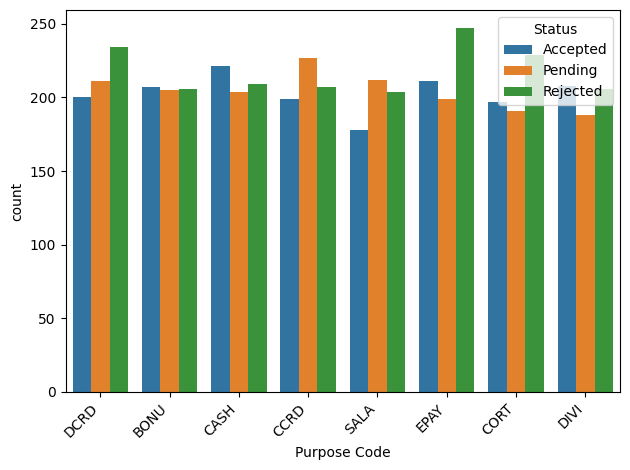

In [ ]:
sns.countplot(data=data, x='Purpose Code', hue='Status')
#  'Status' is used as the hue, you can change it to other columns
# like 'Charges Bearer', 'Message Type' etc.
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

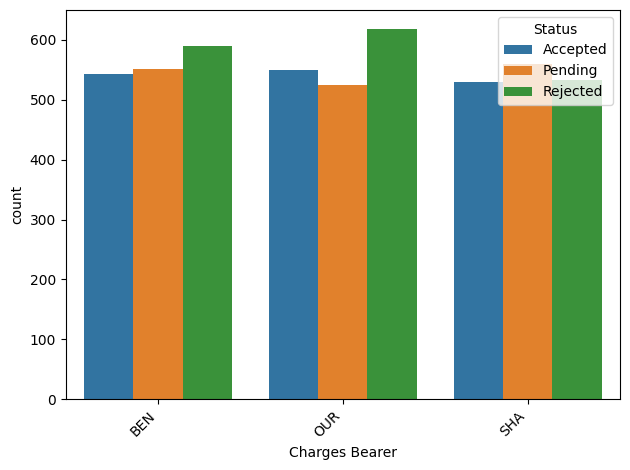

In [ ]:
sns.countplot(data=data, x='Charges Bearer', hue='Status')
#  'Status' is used as the hue, you can change it to other columns
# like 'Charges Bearer', 'Message Type' etc.
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:


data[['Payment_Currency', 'Payment_Amount']] = data['Payment Amount (Currency)'].str.split(' ', expand=True)

data[['Sender_Charge_Currency', 'Sender_Charge_Amount']] = data["Sender's Charges"].str.split(' ', expand=True)

data[['Intermediary_Charge_Currency', 'Intermediary_Charge_Amount']] = data["Intermediary Charges"].str.split(' ', expand=True)

data.info()

data.drop(["Sender's Charges"],axis=1,inplace=True)
data.drop(['Payment Amount (Currency)'],axis=1,inplace=True)
data.drop(['Intermediary Charges'],axis=1,inplace=True)


KeyError: 'Payment Amount (Currency)'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Message Type                   5000 non-null   object        
 1   Message ID                     5000 non-null   object        
 2   Execution Date                 5000 non-null   datetime64[ns]
 3   Debtor Name                    5000 non-null   object        
 4   Debtor Account Number          5000 non-null   object        
 5   Creditor Name                  5000 non-null   object        
 6   Creditor Account Number        5000 non-null   object        
 7   Charges Bearer                 5000 non-null   object        
 8   Remittance Information         5000 non-null   object        
 9   Status                         5000 non-null   object        
 10  Exchange Rate (if applicable)  5000 non-null   float64       
 11  Purpose Code     

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Message Type                   5000 non-null   object        
 1   Message ID                     5000 non-null   object        
 2   Execution Date                 5000 non-null   datetime64[ns]
 3   Debtor Name                    5000 non-null   object        
 4   Debtor Account Number          5000 non-null   object        
 5   Creditor Name                  5000 non-null   object        
 6   Creditor Account Number        5000 non-null   object        
 7   Charges Bearer                 5000 non-null   object        
 8   Remittance Information         5000 non-null   object        
 9   Status                         5000 non-null   object        
 10  Exchange Rate (if applicable)  5000 non-null   float64       
 11  Purpose Code     

In [63]:
data.groupby('Charges Bearer').value_counts()


Charges Bearer  Message Type  Message ID  Execution Date  Debtor Name      Debtor Account Number  Creditor Name      Creditor Account Number  Remittance Information  Status    Exchange Rate (if applicable)  Purpose Code     Payment_Currency  Payment_Amount  Sender_Charge_Currency  Sender_Charge_Amount  Intermediary_Charge_Currency  Intermediary_Charge_Amount
BEN             PACS.008      REF100008   2025-01-17      Jeffrey Jones    YULF89088902328858     Eric Jordan        PFNC63249197395137       Invoice Payment         Accepted  1.4902                         Loan Repayment   USD               40756.71        USD                     254.28                USD                           141.64                        1
                              REF100016   2025-01-18      Victoria Hoover  RMGV53329283910630     Brent Schultz      TDQD32183496591476       Loan Repayment          Accepted  1.0491                         FX Settlement    GBP               72423.19        GBP                     343.06                GBP                           180.82                        1
                              REF100026   2025-01-06      Jesse Stevenson  IQIC04716230514499     Katherine Nguyen   EJEM56894044201190       Loan Repayment          Rejected  1.4688                         FX Settlement    INR               74433.69        INR                     169.97                INR                           2.51                          1
                              REF100035   2025-01-14      Tracy Moyer      OPAW90106506758920     Jennifer Walker    WSNV17531848264389       Salary Payment          Accepted  1.2915                         Loan Repayment   GBP               84722.5         GBP                     25.03                 GBP                           2.35                          1
                              REF100037   2025-01-21      Lisa Morris      EAVQ63647914340268     Jacqueline Gentry  YEJM50999554732713       Loan Repayment          Pending   1.3182                         Loan Repayment   EUR               39613.44        EUR                     40.02                 EUR                           17.78                         1
                                                                                                                                                                                                                                                                                                                                                                           ..
SHA             PACS.009      REF104967   2025-01-02      Denise Vargas    QFTI54701414382663     Mark Page          XESP03033745231303       Salary Payment          Accepted  1.2768                         Invoice Payment  EUR               17136.85        EUR                     348.5                 EUR                           118.82                        1
                              REF104969   2025-01-11      Melissa Abbott   CDJH13946112555354     Jodi Brown         QUMZ68463366444787       FX Settlement           Accepted  0.8916                         FX Settlement    USD               80678.78        USD                     203.07                USD                           169.36                        1
                              REF104970   2025-01-11      Julian Alvarez   WETI98855504032616     Jeffrey Roberson   CEET41590962817619       Loan Repayment          Accepted  1.4654                         Invoice Payment  JPY               3882.76         JPY                     99.89                 JPY                           80.32                         1
                              REF104974   2025-01-14      David Manning    ZQVM70896903473077     Michelle Banks     WZUD89042629981559       Invoice Payment         Rejected  0.9696                         Salary Payment   JPY               29601.72        JPY                     43.54                 JPY                           92.54      

In [64]:
data.value_counts().groupby('Purpose Code').count()

,count
Purpose Code,
FX Settlement,998
Invoice Payment,990
Loan Repayment,1017
Salary Payment,996
Trade Settlement,999


In [ ]:
data.value_counts().groupby('Purpose Code').count()

,count
Purpose Code,
FX Settlement,998
Invoice Payment,990
Loan Repayment,1017
Salary Payment,996
Trade Settlement,999


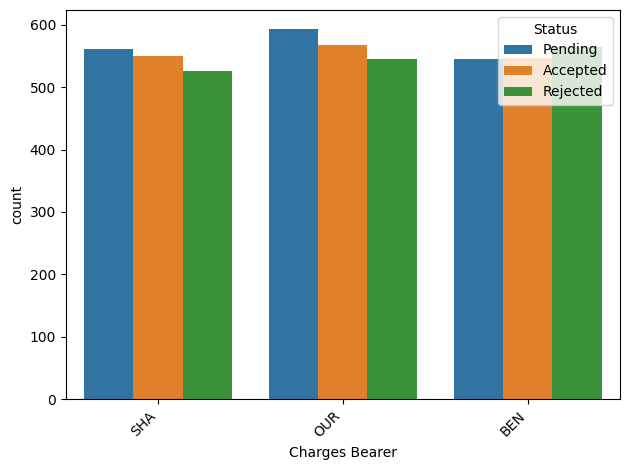

In [ ]:
sns.countplot(data=data, x='Charges Bearer', hue='Status')
#  'Status' is used as the hue, you can change it to other columns
# like 'Charges Bearer', 'Message Type' etc.
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

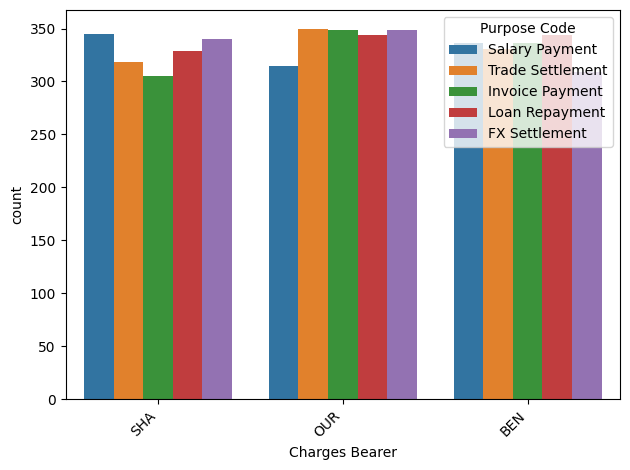

In [ ]:
sns.countplot(data=data, x='Charges Bearer', hue='Purpose Code')
#  'Status' is used as the hue, you can change it to other columns
# like 'Charges Bearer', 'Message Type' etc.
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [70]:
#Data shows Remittance Information with Payment Amount
data.groupby(['Remittance Information']).Payment_Amount.min()


#data.groupby(['Remittance Information']).Payment_Amount.min().sort_values(ascending=False)
#data.groupby(['Remittance Information']).Payment_Amount.sum().sort_values(ascending=True)

,Payment_Amount
Remittance Information,
FX Settlement,10115.78
Invoice Payment,10400.76
Loan Repayment,10146.4
Salary Payment,10066.15
Trade Settlement,10014.64


<Axes: xlabel='Remittance Information,Charges Bearer'>

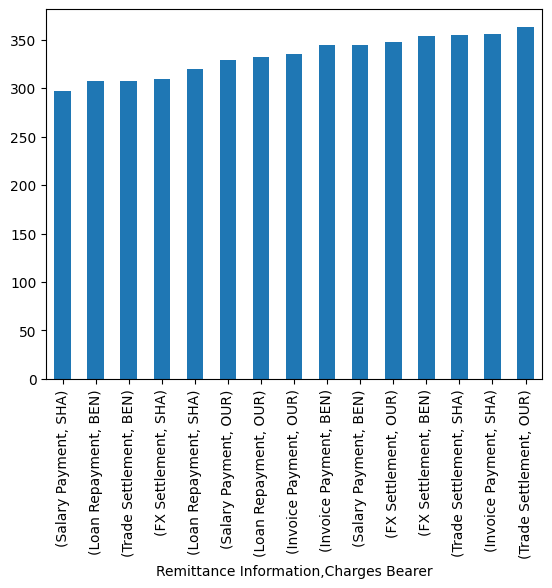

In [71]:
#data.groupby(['Remittance Information']).Payment_Amount.min().sort_values(ascending=False)

data.groupby(['Remittance Information','Charges Bearer']).Payment_Currency.count().sort_values(ascending=True)
data.groupby(['Remittance Information','Charges Bearer']).Payment_Currency.count().sort_values(ascending=True).plot(kind='bar')

In [72]:

data.groupby(['Execution Date','Charges Bearer']).Payment_Currency.count().sort_values(ascending=True)

,,Payment_Currency
Execution Date,Charges Bearer,
2025-01-19,SHA,64
2025-01-13,BEN,65
2025-01-19,BEN,65
2025-01-12,SHA,66
2025-01-17,SHA,67
...,...,...
2025-01-01,SHA,92
2025-01-07,SHA,94
2025-01-17,OUR,94


In [80]:

data.groupby(['Remittance Information','Execution Date']).Payment_Currency.count().sort_values(ascending=True)


AttributeError: 'DataFrameGroupBy' object has no attribute 'Execution_Date'

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


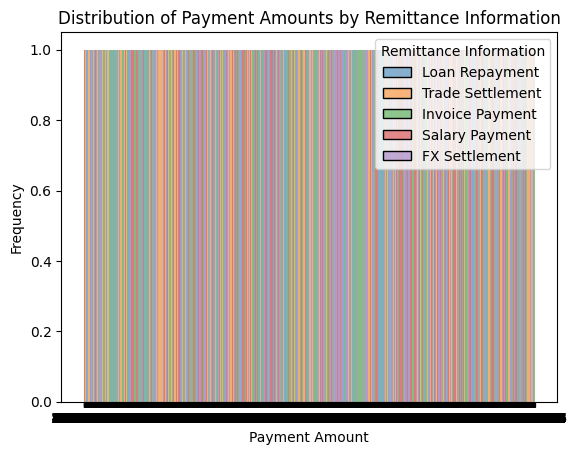

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Payment_Amount' to numeric
data['Payment_Amount'] = pd.to_numeric(data['Payment_Amount'])

# Create a histogram
plt.hist(data['Payment_Amount'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('Payment Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Payment Amounts')
plt.show()